# 0.0 - Imports

In [54]:
import pandas as pd
import inflection
import numpy as np
import math
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import Image
from datetime import datetime, timedelta

## 0.1 - Helper function

In [2]:
snakecase = lambda x: inflection.underscore(x) 

## 0.2 - Load Dataset

In [3]:
df_raw_sales = pd.read_csv('/home/aderaldo/estudos/comunidade_ds/DataScience_Em_Producao/Data/train.csv', low_memory = False)

df_raw_store = pd.read_csv('/home/aderaldo/estudos/comunidade_ds/DataScience_Em_Producao/Data/store.csv', low_memory = False)

df_raw = pd.merge( df_raw_sales, df_raw_store, how = 'left', on = 'Store')

# 1.0 - Data Description

In [41]:
df1 = df_raw.copy()

## 1.1 - Rename Columns

In [5]:
df_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [42]:
old_cols = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

news_cols = list( map(snakecase, old_cols) )


In [43]:
df1.columns = news_cols

In [7]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2 - Data Dimesion

In [9]:
print("Number of rows: {}".format(df1.shape[0]))
print("Number of cols: {}".format(df1.shape[1]))

Number of rows: 1017209
Number of cols: 18


## 1.3 - Data Types

In [44]:
df1["date"] = pd.to_datetime( df1["date"] )
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 - Check NA

In [45]:
df1.isna().sum()
# por que os NA estão nessas colunas?

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 - Fillout NA

In [47]:
# competition_distance
# É a distância entre os competidores
# subistitui os valores ausente pelo valor máximo encontrado nessa coluna;
max_valor = df1["competition_distance"].max()

df1['competition_distance'] = df1['competition_distance'].apply(lambda x: max_valor if pd.isnull(x) else x)

# competition_open_since_month
# É um numero contendo o mês e ano que a loja competidora foi aberta
# A lógica para a subistituição vai ser a extração do valor do mês da coluna data;
df1['competition_open_since_month'] = df1['competition_open_since_month'].fillna(df1['date'].dt.month)

# competition_open_since_year
# A mesma lógica do exemplo anterior
df1['competition_open_since_year'] = df1['competition_open_since_year'].fillna(df1['date'].dt.year)

df1['promo2_since_week'] = df1.apply( lambda x: x['date'].week if math.isnan(x['promo2_since_week'] ) else x['promo2_since_week'], axis=1 )

#promo2_since_year
df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan(x['promo2_since_year'] ) else x['promo2_since_year'], axis=1 )

#promo_interval
month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df1['promo_interval'].fillna(0, inplace=True )
df1['month_map'] = df1['date'].dt.month.map( month_map )

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis=1 )

In [15]:
df1["promo2"].value_counts()

promo2
1    509178
0    508031
Name: count, dtype: int64

## 1.6 - Change Types

In [33]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                       object
promo_interval                          object
dtype: object

In [48]:
df1["competition_open_since_month"] = df1["competition_open_since_month"].astype(int) 
df1["competition_open_since_year"] =  df1["competition_open_since_year"].astype(int)
df1["promo2_since_week"] =  df1["promo2_since_week"].astype(int)
df1["promo2_since_year"] =  df1["promo2_since_year"].astype(int)
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.6 - Description Statiscal

In [25]:
num_attributes = df1.select_dtypes( include = ['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude = ['int64', 'float64', 'datetime64[ns]'] )

In [28]:
cat_attributes.sample(2)

,state_holiday,store_type,assortment,promo_interval
521454,0,d,c,"Jan,Apr,Jul,Oct"
246836,0,d,c,"Jan,Apr,Jul,Oct"


In [62]:
# Central Tendency 
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion Tendency

d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max( ) - x.min( ) ) ). T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew( ) ) ). T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis( ) ) ). T

# Concat

m = pd.concat( [d3, d2, d4, ct1, ct2, d1, d5, d6] ).T
m.columns = ['min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis' ] 

In [63]:
m

,min,max,range,mean,median,std,skew,kurtosis
store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
competition_distance,20.0,75860.0,75840.0,5613.013481,2330.0,8498.334094,3.599472,19.780674
competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


In [ ]:
# Análise: Na feature de vendas temos um valor mínimo de 0 e máximo de R$ 41551, 
# uma skew próxima de zero e a kurtosis próxima de 1 indica que os dados estão normais.

/tmp/ipykernel_163958/1848217301.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df1["sales"] )
/home/aderaldo/anaconda3/envs/DataScienceEmProducao/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sales', ylabel='Density'>

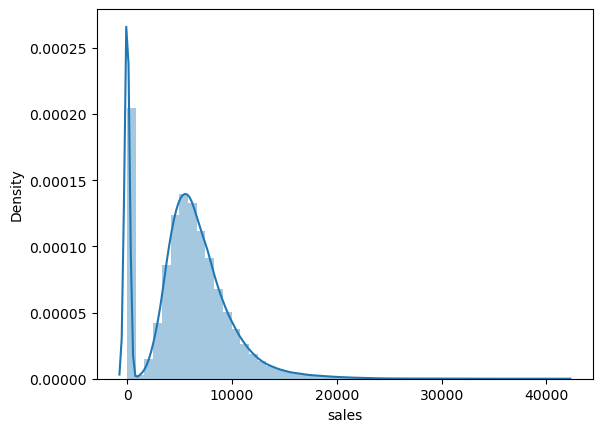

In [70]:
sns.distplot( df1["sales"] )

In [72]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

state_holiday     4
store_type        4
assortment        3
promo_interval    4
dtype: int64

<Axes: xlabel='assortment', ylabel='sales'>

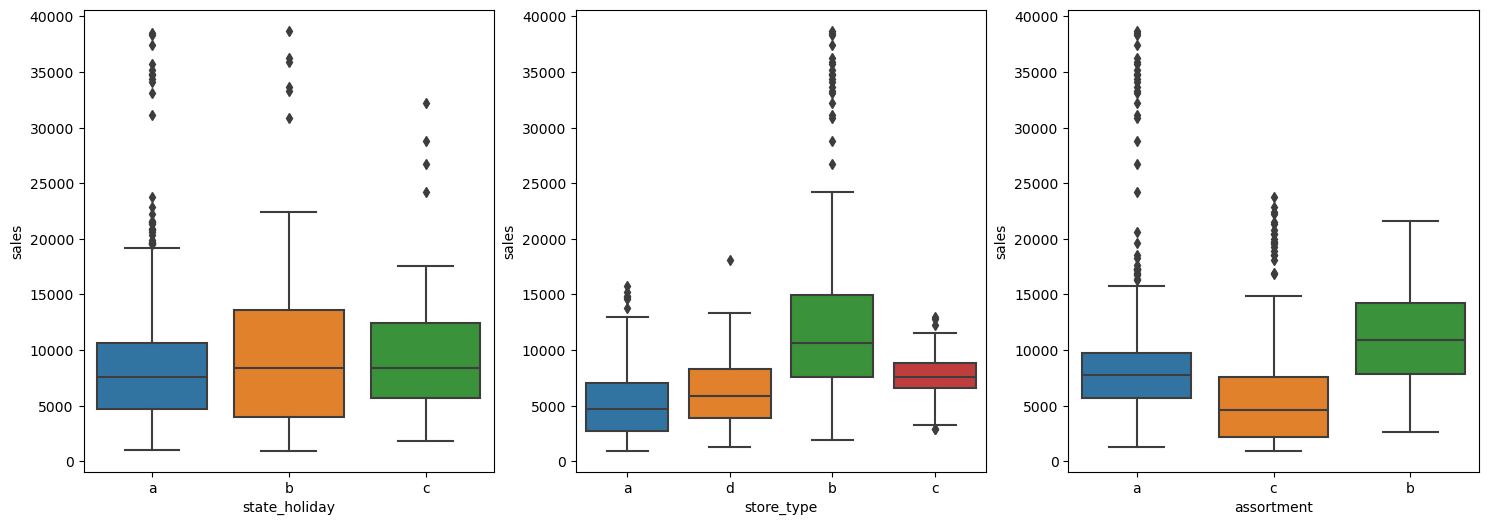

In [81]:
# Fazendo um filtro para retirar os dias em que a loja não esteve fechada
aux1 = df1[(df1['sales'] > 0 ) & ( df1['state_holiday'] != '0')]
plt.figure(figsize=(18, 6))

plt.subplot( 1, 3, 1)
sns.boxplot( x = 'state_holiday', y ='sales', data = aux1)

plt.subplot( 1, 3, 2)
sns.boxplot( x = 'store_type', y ='sales', data = aux1)

plt.subplot( 1, 3, 3)
sns.boxplot( x = 'assortment', y ='sales', data = aux1)


In [ ]:
# Assortment: Variedade de produtos ou itens.
# O tamanho da caixa(box) não está diretamente relacionado ao volume de vendas.

# 2.0 - Hypoteses Mindmap

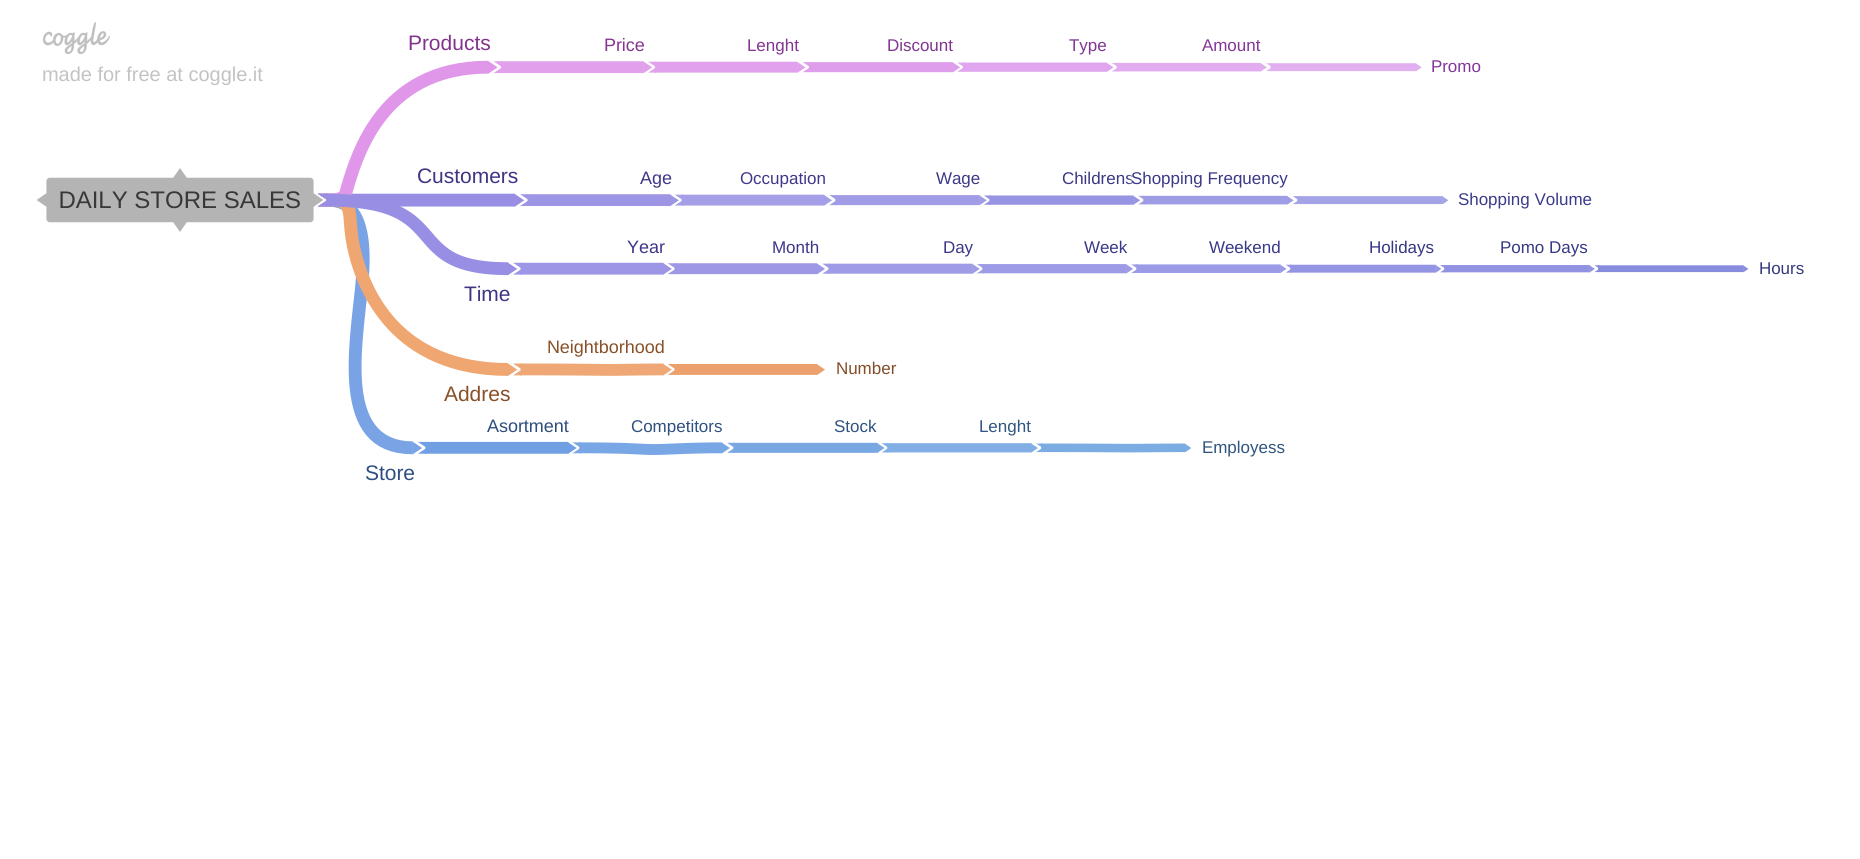

In [6]:
Image( '/home/aderaldo/estudos/comunidade_ds/Imagens/DAILY_STORE_SALES.png' )



## 2.1 - HYPOTHESES

**1.** Lojas com maior sortimentos deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.
    
**3.** Lojas com competidores à mais tempo deveriam vendem mais.
    
**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**6.** Lojas com mais promoções consecutivas deveriam vender mais.

**7.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**8.** Lojas deveriam vender mais ao longo dos anos.

**9.** Lojas deveriam vender mais no segundo semestre do ano.

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**11.** Lojas deveriam vender menos aos finais de semana.

**12.** Lojas deveriam vender menos durante os feriados escolares

# 3.0 - Feature Engineering

In [49]:
df2 = df1.copy()

In [58]:
# year
df2['year'] = df2['date'].dt.year
# month
df2['month'] = df2['date'].dt.month
# day
df2['day'] = df2['date'].dt.day
# week of year
df2['week_of_year'] = df2['date'].dt.strftime("%W-%Y")
# year week
df2['year_of_week'] = df2['date'].dt.strftime("%Y-%W")

# competition since
df2["competition_since"] = df2.apply( lambda x : datetime( year = x["competition_open_since_year"], month = x["competition_open_since_month"], day =1), axis = 1 )
df2["competition_time_month"] = ((df2["date"] - df2["competition_since"]) / 30).apply( lambda x : x.days).astype(int)
# calculo da diferença entre as datas, mantendo a granulalidade mínima por mês. Extraindo o valor e convertendo para inteiro

# promo since
df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )
df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.strptime( x + '-1', '%Y-%W-%w' ) - timedelta( days=7 ) )

df2["promo_time_week"] = ((df2["date"] - df2["promo_since"]) / 7).apply( lambda x : x.days).astype( int)

# assortmant

df2['assortment'] = df2['assortment'].apply(lambda x : 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

# state holiday

df2["state_holiday"] = df2["state_holiday"].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christhmas' if x == 'c' else 'regular_day')

In [56]:
df2.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,month_map,is_promo,year,month,day,week_of_year,year_of_week,competition_since,competition_time_month,promo_since
430384,780,3,2014-06-11,5282,693,1,0,0,0,a,...,Jun,0,2014,6,11,23-2014,2014-23,2014-06-01,0,2014-06-09
